<a href="https://colab.research.google.com/github/juanmaruiz61/Don-t-Overfit-II-Challenge/blob/main/Practica4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Se importar las bibliotecas necesarias: numpy, matplotlib, math y pandas.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Especificamos las rutas en donde se encuentran las bases de datos en el Google Drive. Se usa la funcion de pandas .read_csv para que lea el archivo CSV y lo convierte en un DataFrame

In [ ]:
# Rutas a los archivos CSV en Google Drive (si están allí)
train_path = '/content/drive/My Drive/train.csv'
test_path = '/content/drive/My Drive/test.csv'
sample_submission_path = '/content/drive/My Drive/sample_submission.csv'

# Leer los archivos CSV
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)
sample_submission_data = pd.read_csv(sample_submission_path)


Verificamos que no haya valores nulos en las columnas de las distintas bases de datos, para ello usamos el .isnull:

In [ ]:
nul = 0
for col in train.columns:
    if(train[col].isnull().any()):
        print(col,'has null values')
        nul = 1
if(nul==0):
    print('There is no Null value present')

There is no Null value present


In [ ]:
nul = 0
for col in sample_submission_data.columns:
    if(sample_submission_data[col].isnull().any()):
        print(col,'has null values')
        nul = 1
if(nul==0):
    print('There is no Null value present')

There is no Null value present


In [ ]:
nul = 0
for col in test.columns:
    if(test[col].isnull().any()):
        print(col,'has null values')
        nul = 1
if(nul==0):
    print('There is no Null value present')

There is no Null value present


In [ ]:
sample_submission_data

,id,target
0,250,0
1,251,0
2,252,0
3,253,0
4,254,0
...,...,...
19745,19995,0
19746,19996,0
19747,19997,0
19748,19998,0


In [ ]:
train

,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
0,0,1.0,-1.067,-1.114,-0.616,0.376,1.090,0.467,-0.422,0.460,...,0.220,-0.339,0.254,-0.179,0.352,0.125,0.347,0.436,0.958,-0.824
1,1,0.0,-0.831,0.271,1.716,1.096,1.731,-0.197,1.904,-0.265,...,-0.765,-0.735,-1.158,2.554,0.856,-1.506,0.462,-0.029,-1.932,-0.343
2,2,0.0,0.099,1.390,-0.732,-1.065,0.005,-0.081,-1.450,0.317,...,-1.311,0.799,-1.001,1.544,0.575,-0.309,-0.339,-0.148,-0.646,0.725
3,3,1.0,-0.989,-0.916,-1.343,0.145,0.543,0.636,1.127,0.189,...,-1.370,1.093,0.596,-0.589,-0.649,-0.163,-0.958,-1.081,0.805,3.401
4,4,0.0,0.811,-1.509,0.522,-0.360,-0.220,-0.959,0.334,-0.566,...,-0.178,0.718,-1.017,1.249,-0.596,-0.445,1.751,1.442,-0.393,-0.643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,245,1.0,-0.068,-0.184,-1.153,0.610,0.414,1.557,-0.234,0.950,...,1.492,1.430,-0.333,-0.200,-1.073,0.797,1.980,1.191,1.032,-0.402
246,246,0.0,-0.234,-1.373,-2.050,-0.408,-0.255,0.784,0.986,-0.891,...,-0.996,0.678,1.395,0.714,0.215,-0.537,-1.267,-1.021,0.747,0.128
247,247,0.0,-2.327,-1.834,-0.762,0.660,-0.858,-2.764,-0.539,-0.065,...,-1.237,-0.620,0.670,-2.010,0.438,1.972,-0.379,0.676,-1.220,-0.855
248,248,1.0,-0.451,-0.204,-0.762,0.261,0.022,-1.487,-1.122,0.141,...,0.729,0.411,2.366,-0.021,0.160,0.045,0.208,-2.117,-0.546,-0.093


In [ ]:
test

,id,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
0,250,-0.677,1.721,-0.745,-0.838,0.149,-1.138,0.242,0.504,-1.829,...,-1.180,-0.403,0.759,-0.600,0.951,-0.349,0.446,-0.819,-0.277,1.297
1,251,-0.731,-0.251,0.059,0.054,1.149,2.462,0.836,0.719,-2.269,...,1.297,1.114,0.657,0.760,0.899,-1.612,-1.701,1.107,-0.314,-0.641
2,252,1.119,1.036,1.220,1.518,0.265,-0.088,0.245,-0.533,-0.921,...,-0.864,-0.736,0.367,0.154,0.830,-1.352,0.914,0.377,0.588,-0.912
3,253,-0.933,0.212,-0.053,0.570,-1.540,-1.108,0.462,1.022,-0.215,...,0.063,-0.958,0.762,-0.213,-2.171,0.830,1.435,0.125,2.782,0.619
4,254,-0.208,-0.556,2.641,0.853,-0.384,0.312,0.514,0.481,-1.929,...,-0.689,0.213,0.568,-0.935,-0.015,0.267,0.739,1.340,-0.178,1.010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19745,19995,0.630,-0.244,-1.175,0.948,1.254,-1.297,-1.317,1.470,-1.958,...,-1.171,0.902,-0.006,-0.893,0.238,1.157,0.895,-1.760,-2.381,0.901
19746,19996,-0.963,0.573,-0.482,-0.519,-0.433,-2.687,0.027,0.500,1.498,...,1.366,-0.262,1.583,2.449,-1.081,-0.199,-1.342,-1.732,0.263,-0.337
19747,19997,-1.564,0.010,-1.097,0.434,-0.271,-1.777,0.184,-0.916,-0.527,...,-0.712,0.212,0.613,0.514,0.440,0.640,0.175,0.825,-0.809,1.653
19748,19998,0.196,-3.164,0.903,0.638,0.615,0.295,0.580,0.398,-0.510,...,-0.406,1.489,1.571,-0.076,-0.438,0.755,1.812,0.770,-0.870,0.160


Zona de declaraciones

In [ ]:
DIGIT  [0-9]

LETTER [a-zA-Z]

NUMBER1 {DIGIT}+\.?

NUMBER2 {DIGIT}*\.{DIGIT}+

IDENTIFIER  {LETTER}({LETTER}|{DIGIT})*

In [ ]:
!pip3 install scikit-plot

Obtener las dimensiones del DataFrame 'train' y 'test' se hace uso de un .shape

In [ ]:
train.shape, test.shape

((250, 302), (19750, 301))

<Axes: ylabel='count'>

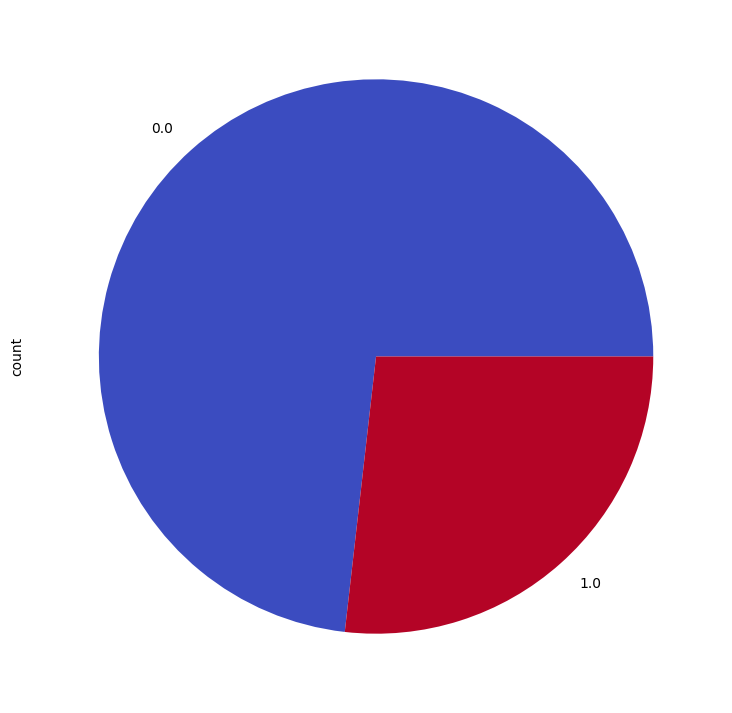

In [ ]:
train['target'].value_counts().plot(kind="pie", figsize=(12,9), colormap="coolwarm")

La clase 0.0 es mucho más común que la clase 1.0 en el conjunto de datos train, esto demuestra que hay desbalanceo de clases.

In [ ]:
train.isna().sum().sum()

0

La libreria gc expone el mecanismo de administración de memoria subyacente de Python, el recolector de basura automático.

In [ ]:
import gc

Seleccionamosclas características numéricas del DataFrame 'train', excluyendo las dos primeras columnas

In [ ]:
numerical_features = train.columns[2:]

Distributions - Histograms columns


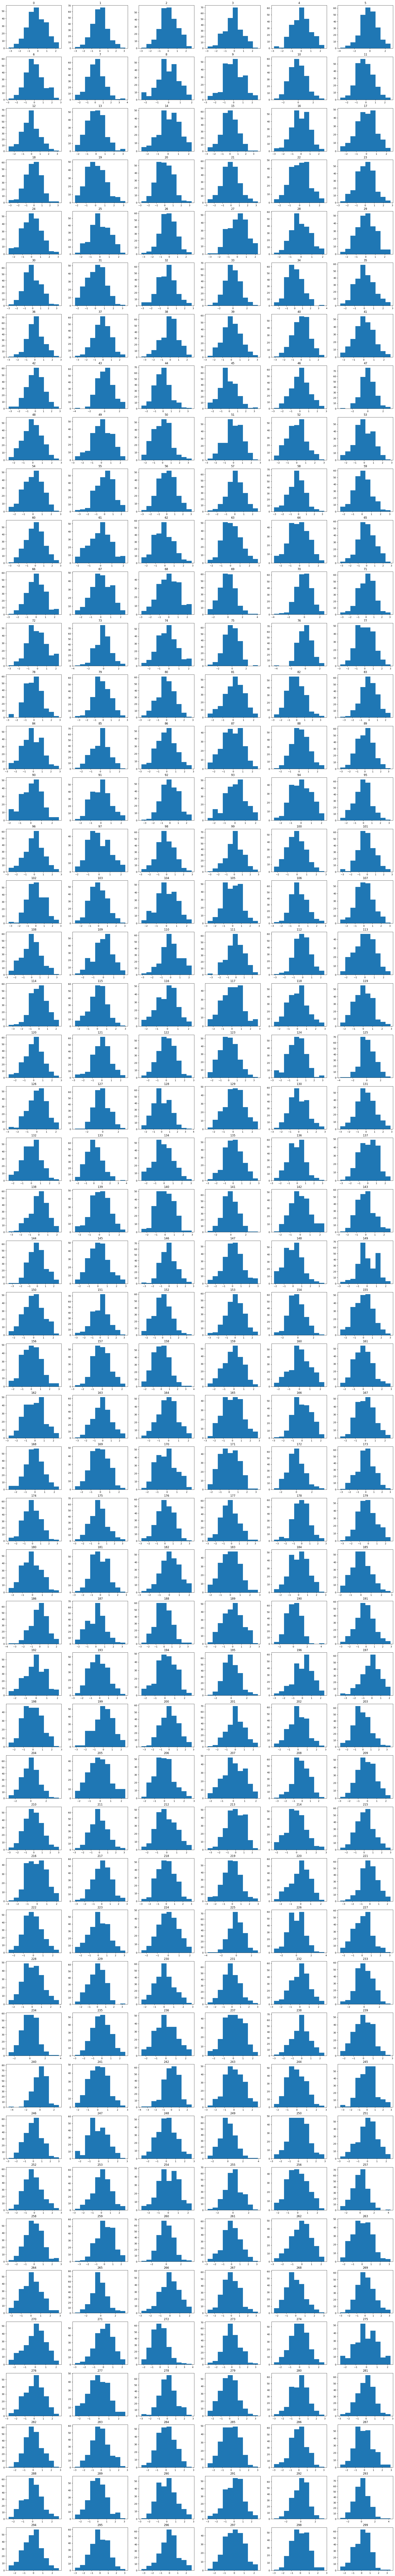

In [ ]:
print('Distributions - Histograms columns')
plt.figure(figsize=(30, 200))
for i, col in enumerate(numerical_features):
    plt.subplot(50, 6, i + 1)
    plt.hist(train[col])
    plt.title(col)
gc.collect();

Distributions columns


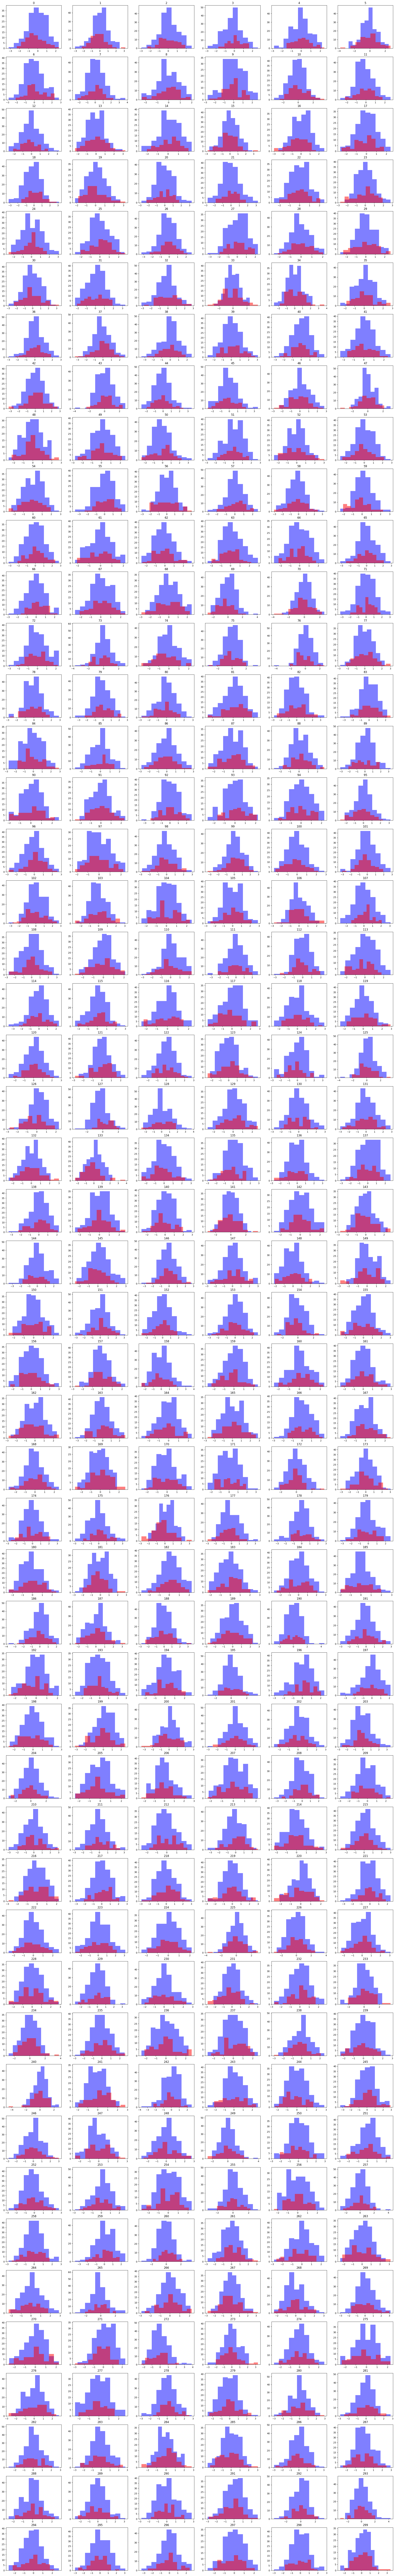

In [ ]:
print('Distributions columns')
plt.figure(figsize=(30, 200))
for i, col in enumerate(numerical_features):
    plt.subplot(50, 6, i + 1)
    plt.hist(train[train["target"] == 0][col], alpha=0.5, label='0', color='b')
    plt.hist(train[train["target"] == 1][col], alpha=0.5, label='1', color='r')
    plt.title(col)
gc.collect();

Importamos la libreria Seaborn

In [ ]:
import seaborn as sns

In [ ]:
[numerical_features]

[Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
        ...
        '290', '291', '292', '293', '294', '295', '296', '297', '298', '299'],
       dtype='object', length=300)]

In [ ]:
train.shape, test.shape

((250, 302), (19750, 301))

## **Preprocesamiento de Datos**

In [ ]:
train.columns

Index(['id', 'target', '0', '1', '2', '3', '4', '5', '6', '7',
       ...
       '290', '291', '292', '293', '294', '295', '296', '297', '298', '299'],
      dtype='object', length=302)

In [ ]:
train.head(6)

,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
0,0,1.0,-1.067,-1.114,-0.616,0.376,1.090,0.467,-0.422,0.460,...,0.220,-0.339,0.254,-0.179,0.352,0.125,0.347,0.436,0.958,-0.824
1,1,0.0,-0.831,0.271,1.716,1.096,1.731,-0.197,1.904,-0.265,...,-0.765,-0.735,-1.158,2.554,0.856,-1.506,0.462,-0.029,-1.932,-0.343
2,2,0.0,0.099,1.390,-0.732,-1.065,0.005,-0.081,-1.450,0.317,...,-1.311,0.799,-1.001,1.544,0.575,-0.309,-0.339,-0.148,-0.646,0.725
3,3,1.0,-0.989,-0.916,-1.343,0.145,0.543,0.636,1.127,0.189,...,-1.370,1.093,0.596,-0.589,-0.649,-0.163,-0.958,-1.081,0.805,3.401
4,4,0.0,0.811,-1.509,0.522,-0.360,-0.220,-0.959,0.334,-0.566,...,-0.178,0.718,-1.017,1.249,-0.596,-0.445,1.751,1.442,-0.393,-0.643
5,5,0.0,0.739,0.211,-0.836,-1.430,-0.291,-0.989,0.091,0.107,...,-1.501,-1.960,0.671,0.091,-1.467,-1.011,-0.118,-0.257,-0.337,-1.064


In [ ]:
y = train['target']
X = train.drop(['target', "id"], axis=1)

In [ ]:
test

,id,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
0,250,-0.677,1.721,-0.745,-0.838,0.149,-1.138,0.242,0.504,-1.829,...,-1.180,-0.403,0.759,-0.600,0.951,-0.349,0.446,-0.819,-0.277,1.297
1,251,-0.731,-0.251,0.059,0.054,1.149,2.462,0.836,0.719,-2.269,...,1.297,1.114,0.657,0.760,0.899,-1.612,-1.701,1.107,-0.314,-0.641
2,252,1.119,1.036,1.220,1.518,0.265,-0.088,0.245,-0.533,-0.921,...,-0.864,-0.736,0.367,0.154,0.830,-1.352,0.914,0.377,0.588,-0.912
3,253,-0.933,0.212,-0.053,0.570,-1.540,-1.108,0.462,1.022,-0.215,...,0.063,-0.958,0.762,-0.213,-2.171,0.830,1.435,0.125,2.782,0.619
4,254,-0.208,-0.556,2.641,0.853,-0.384,0.312,0.514,0.481,-1.929,...,-0.689,0.213,0.568,-0.935,-0.015,0.267,0.739,1.340,-0.178,1.010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19745,19995,0.630,-0.244,-1.175,0.948,1.254,-1.297,-1.317,1.470,-1.958,...,-1.171,0.902,-0.006,-0.893,0.238,1.157,0.895,-1.760,-2.381,0.901
19746,19996,-0.963,0.573,-0.482,-0.519,-0.433,-2.687,0.027,0.500,1.498,...,1.366,-0.262,1.583,2.449,-1.081,-0.199,-1.342,-1.732,0.263,-0.337
19747,19997,-1.564,0.010,-1.097,0.434,-0.271,-1.777,0.184,-0.916,-0.527,...,-0.712,0.212,0.613,0.514,0.440,0.640,0.175,0.825,-0.809,1.653
19748,19998,0.196,-3.164,0.903,0.638,0.615,0.295,0.580,0.398,-0.510,...,-0.406,1.489,1.571,-0.076,-0.438,0.755,1.812,0.770,-0.870,0.160


In [ ]:
clf_stats_df = pd.DataFrame(columns=["clf_name", "F1-score", "auc-score"])

,clf_name,F1-score,auc-score


In [ ]:
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, RepeatedStratifiedKFold
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import scikitplot as skplt
import time
import random
from sklearn.feature_selection import RFE
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import VotingClassifier,BaggingClassifier, ExtraTreesClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression, Lasso
import xgboost as xgb
from imblearn.over_sampling import SMOTE



log_clf Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.64      0.72        56
         1.0       0.35      0.58      0.44        19

    accuracy                           0.63        75
   macro avg       0.59      0.61      0.58        75
weighted avg       0.70      0.63      0.65        75

CV f1_score: 0.5800000000000001
CV roc_auc_score: 0.7171052631578947
Elapsed time in seconds: 0.05139493942260742

rand_clf Classification Report:
               precision    recall  f1-score   support

         0.0       0.76      0.73      0.75        56
         1.0       0.29      0.32      0.30        19

    accuracy                           0.63        75
   macro avg       0.52      0.52      0.52        75
weighted avg       0.64      0.63      0.63        75

CV f1_score: 0.5227272727272727
CV roc_auc_score: 0.5780075187969925
Elapsed time in seconds: 0.27556443214416504

extra_clf Classification Report:
               pr

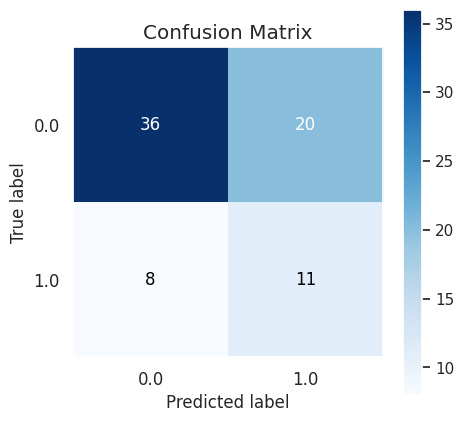

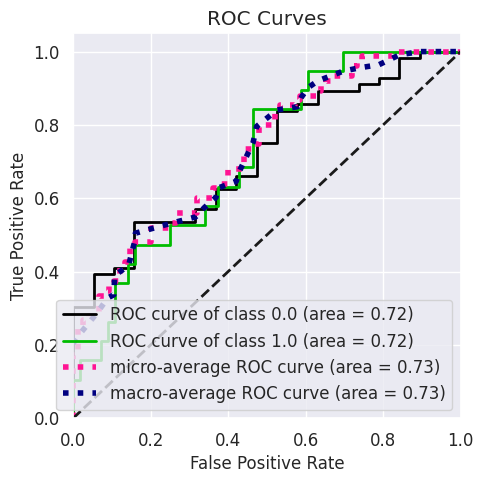

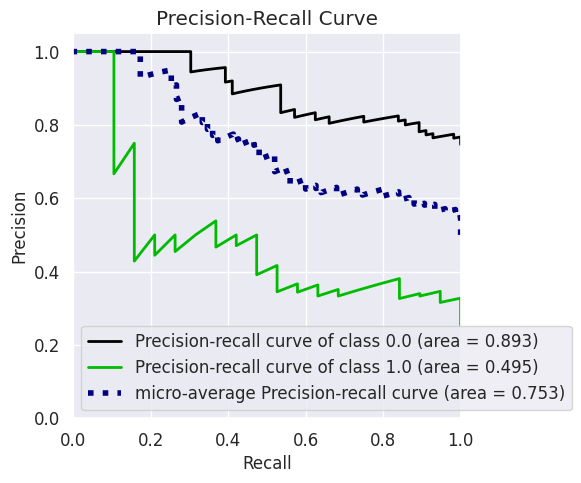

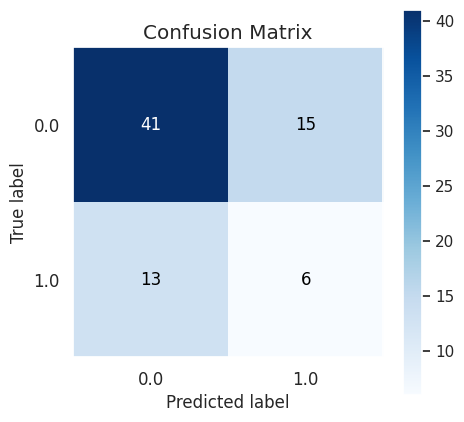

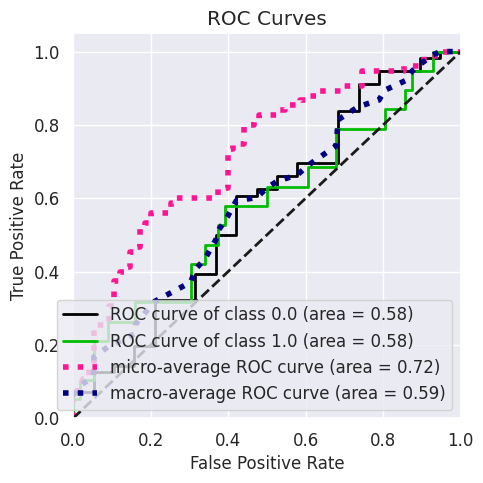

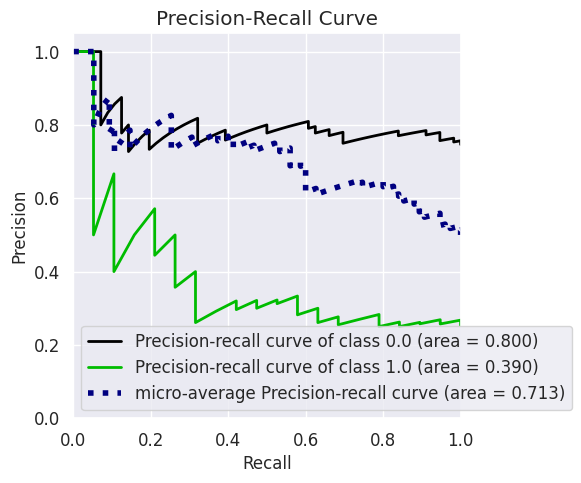

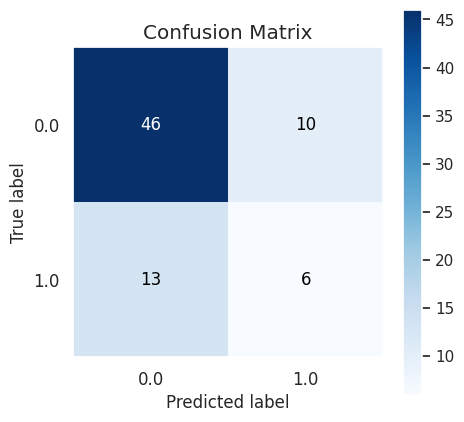

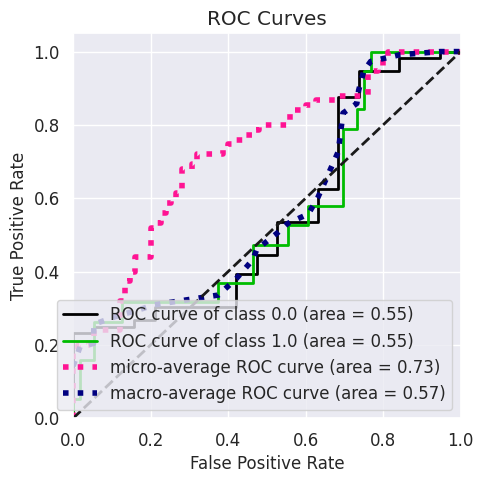

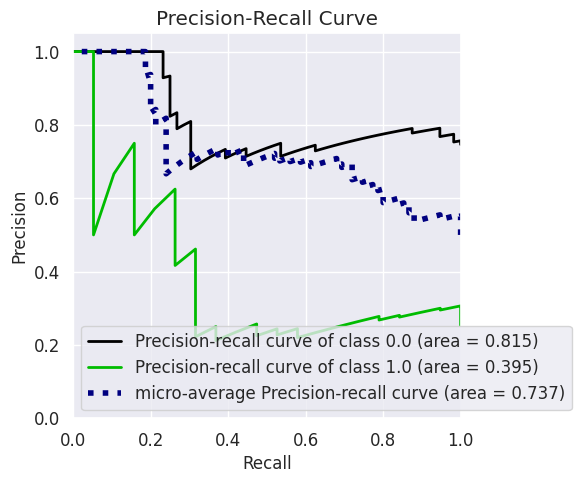

In [ ]:
# create a 70(train)/30(test) stratified split of the data

xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, random_state=42, test_size=0.3)

# Balancear las clases en el conjunto de entrenamiento
smote = SMOTE(random_state=42)
xtrain_balanced, ytrain_balanced = smote.fit_resample(xtrain, ytrain)
# Lista de clasificadores y sus nombres
classifiers = [
    LogisticRegression(C=0.1, class_weight='balanced', penalty='l1', solver='liblinear', random_state=42),
    RandomForestClassifier(max_depth=2, random_state=42),
    ExtraTreesClassifier(max_depth=2, random_state=42)
]
clf_names = ['log_clf', 'rand_clf', 'extra_clf']
clf_stats_df = pd.DataFrame(columns=["clf_name", "F1-score", "auc-score"])

# Para cada clasificador, entrenar, predecir y evaluar
for clf, name in zip(classifiers, clf_names):
    start_time = time.time()

    # Entrenar el clasificador
    clf.fit(xtrain_balanced, ytrain_balanced)

    # Realizar predicciones y calcular probabilidades
    predictions = clf.predict(xvalid)
    predictions_probas = clf.predict_proba(xvalid)

    # Evaluar el clasificador
    print(f"\n{name} Classification Report:\n", classification_report(yvalid, predictions))
    print(f"CV f1_score: {f1_score(yvalid, predictions, average='macro')}")
    print(f"CV roc_auc_score: {roc_auc_score(yvalid, predictions_probas[:, 1], average='macro')}")
    print(f"Elapsed time in seconds: {time.time() - start_time}")

    # Agregar resultados a clf_stats_df
    new_row = pd.DataFrame({
        "clf_name": [name],
        "F1-score": [f1_score(yvalid, predictions, average="macro")],
        "auc-score": [roc_auc_score(yvalid, predictions_probas[:, 1], average="macro")]
    })
    clf_stats_df = pd.concat([clf_stats_df, new_row], ignore_index=True)

    # Visualización de las métricas
    sns.set(rc={'figure.figsize': (5, 5)})
    skplt.metrics.plot_confusion_matrix(yvalid, predictions, normalize=False)
    sns.set(rc={'figure.figsize': (5, 5)})
    skplt.metrics.plot_roc(yvalid, predictions_probas)
    sns.set(rc={'figure.figsize': (5, 5)})
    skplt.metrics.plot_precision_recall(yvalid, predictions_probas)

print(clf_stats_df)

In [ ]:
clf = classifiers[0]
xvalid = test.drop("id", axis=1)
start_time = time.time()
# Realizar predicciones y calcular probabilidades
predictions = clf.predict(xvalid)


In [ ]:
assert len(sample_submission_data) == len(predictions), "Length mismatch between DataFrame and predictions list."

sample_submission_data['target'] = predictions
print(sample_submission_data)


          id  target
0        250     1.0
1        251     1.0
2        252     0.0
3        253     1.0
4        254     1.0
...      ...     ...
19745  19995     0.0
19746  19996     1.0
19747  19997     1.0
19748  19998     1.0
19749  19999     1.0

[19750 rows x 2 columns]


In [ ]:
filename = "/content/drive/My Drive/sample_submission.csv"
sample_submission_data.to_csv(filename, index=False)

print(f"El archivo {filename} ha sido creado.")


El archivo /content/drive/My Drive/sample_submission.csv ha sido creado.
